In [1]:
# from utils.json2numpy import json2numpy
# json2numpy("dataset/train.json", "dataset/train/imgs", "dataset/train/masks")
# json2numpy("dataset/test.json", "dataset/test/imgs", "dataset/test/masks")

In [1]:
import cv2
import glob
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
from utils.compute_iou import compute_ious
from main import segment_fish

In [2]:
data_root = osp.join("dataset", "train", "imgs")
img_paths = glob.glob(osp.join(data_root, "*.jpg"))
len(img_paths)

5

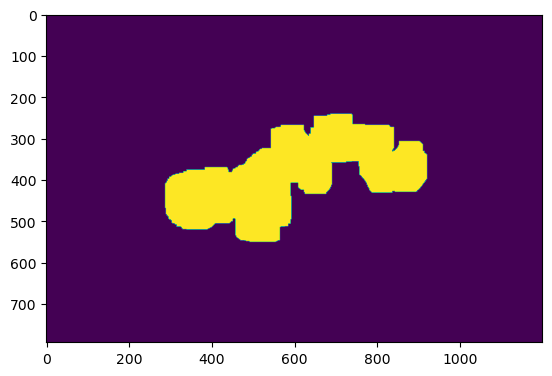

In [3]:
img = cv2.imread(img_paths[4])
img = img[:,:,::-1]
img_HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img)

lower_red = np.array([1, 190, 150])
upper_red = np.array([30, 255, 255])
mask_red = cv2.inRange(img_HSV, lower_red, upper_red)
lower_white = np.array([60, 0, 200])
upper_white = np.array([145, 150, 255])
mask_white = cv2.inRange(img_HSV, lower_white, upper_white)
mask = mask_red | mask_white

kernel = np.ones((4, 4),np.uint8)
erosion = cv2.erode(mask, kernel, iterations = 5)
dilation = cv2.dilate(erosion, kernel, iterations = 10)

scale_percent = 50 # percent of original size
width = int(mask.shape[1] * scale_percent / 100)
height = int(mask.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(mask, dim, interpolation = cv2.INTER_AREA)
kernel = np.ones((4, 4),np.uint8)
erosion = cv2.erode(resized, kernel, iterations = 3)
dilation = cv2.dilate(erosion, kernel, iterations = 8)
dim = (mask.shape[1], mask.shape[0])
resized = cv2.resize(dilation, dim, interpolation = cv2.INTER_AREA)
ret, thresh1 = cv2.threshold(resized,127,255,cv2.THRESH_BINARY)

plt.imshow(thresh1)
plt.show()

(600, 600) 0.8217274544091931


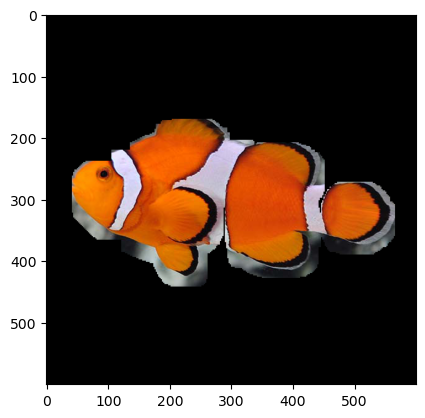

(436, 640) 0.747738074034917


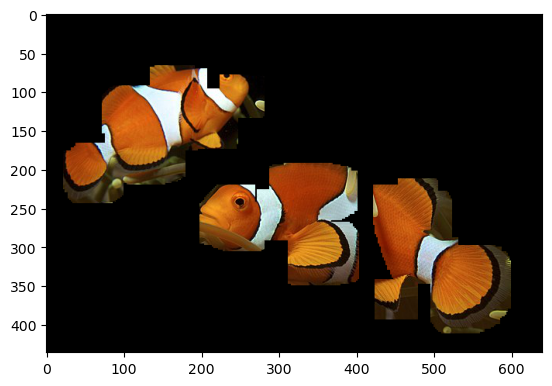

(450, 600) 0.7456903986163826


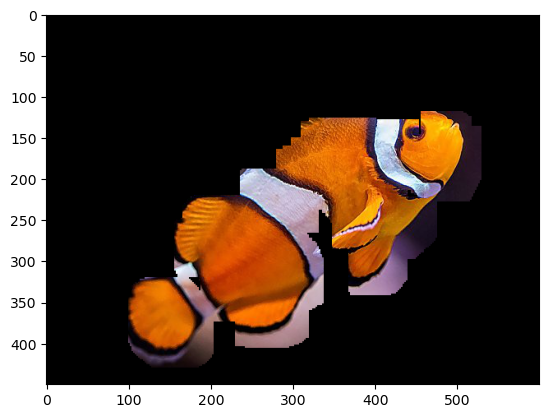

(845, 1200) 0.7417684274652668


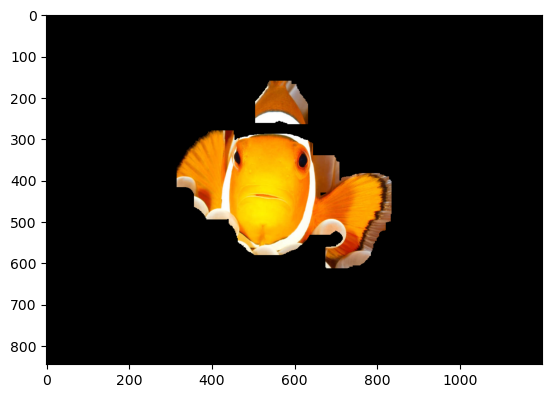

(793, 1200) 0.7255537205292512


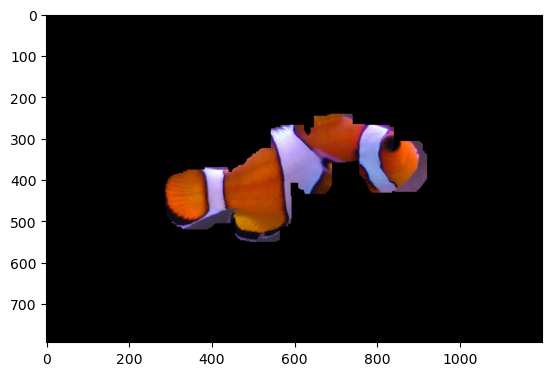

In [4]:
masks = dict()
for path in img_paths:
    img = cv2.imread(path)
    mask = segment_fish(img)
    masks[osp.basename(path)] = mask
    print(mask.shape, compute_ious(masks, osp.join("dataset", "train", "masks")))
    img = np.where(mask[:,:,None], img, np.zeros_like(img))
    plt.imshow(img[:,:,::-1])
    plt.show()